In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


In [ ]:
# 1. connect file drive
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('dark_background')

from statsmodels.tsa.stattools import adfuller  # kiểm tra chuỗi có tính dừng không -> có phụ thuộc vào thời gian chạy không?
from statsmodels.tsa.seasonal import seasonal_decompose   # phân tích -> thành phần chuỗi gốc, thành phần xu hướng, thành phần mùa vụ và thành phần nhiễu

from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

Mounted at /content/drive


In [ ]:
# 2. Đọc file csv
# company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/IMP.csv'
company_csv = '/content/drive/My Drive/data1/CTG_Stock_Data.csv'
# company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/VMD.csv'
data = pd.read_csv(company_csv)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/27/2014,11717867188,11856540039,11648531250,11717867188,11717867188,608510
1,2/6/2014,11648531250,11717867188,11509858398,11648531250,11648531250,1140509
2,2/7/2014,11579194336,11717867188,11509858398,11579194336,11579194336,826750
3,2/10/2014,11509858398,11648531250,11440521484,11509858398,11509858398,1639712
4,2/11/2014,11579194336,11717867188,11440521484,11509858398,11509858398,2082063
...,...,...,...,...,...,...,...
2460,12/8/2023,27000000000,27100000000,26700000000,26900000000,26900000000,4518900
2461,12/11/2023,26950000000,27050000000,26700000000,26850000000,26850000000,2323100
2462,12/12/2023,26900000000,27000000000,26700000000,27000000000,27000000000,3346200
2463,12/13/2023,27150000000,27350000000,26700000000,26750000000,26750000000,3749800


In [ ]:
# 2. Đọc file dữ liệu và chia train test  theo tỉ lệ 8:2
df = pd.read_csv(company_csv)
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing.
train_size = int(0.8* len(df))
test_size = len(df)-train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
exog_train = np.arange(len(train_data))

In [ ]:
model_autoARIMA = auto_arima(y_train,start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True,
                      exogenous= data[['High','Open','Low']][:len(y_train)])

model_autoARIMA.summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=98551.530, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=97101.160, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=83687.547, Time=0.72 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=83675.314, Time=0.81 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=83677.312, Time=1.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=83677.306, Time=1.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=83684.722, Time=0.96 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=8.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=83674.414, Time=3.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=83687.540, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=83676.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1972
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -41832.207
Date:                Sat, 30 Dec 2023   AIC                          83674.414
Time:                        18:00:10   BIC                          83702.348
Sample:                             0   HQIC                         83684.678
                               - 1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.904e+07   1.92e-12   1.51e+19      0.000     2.9e+07     2.9e+07
ar.L1          0.0492      0.021      2.343      0.019       0.008       0.090
ar.L2          0.9491      0.021     45.091      0.000       0.908       0.990
ma.L1          0.9212      0.026     35.854      0.000       0.871       0.972
sigma2      1.563e+17   2.37e-20   6.58e+36      0.000    1.56e+17    1.56e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2728.64
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.79   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.76e+53. Standard errors may be unstable.
"""

In [ ]:
model = ARIMA(y_train, order=(2,0,1),exog=data[['High','Open','Low']][:len(y_train)]).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1972
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -40029.816
Date:                Sat, 30 Dec 2023   AIC                          80075.631
Time:                        18:00:24   BIC                          80120.326
Sample:                             0   HQIC                         80092.054
                               - 1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.943e+04   1.03e-07   3.83e+11      0.000    3.94e+04    3.94e+04
High           0.8369      0.009     92.857      0.000       0.819       0.855
Open          -0.6521      0.009    -69.294      0.000      -0.671      -0.634
Low            0.8132      0.008    105.787      0.000       0.798       0.828
ar.L1         -0.0610      6.188     -0.010      0.992     -12.190      12.068
ar.L2          0.0101      0.760      0.013      0.989      -1.480       1.500
ma.L1         -0.0614      6.188     -0.010      0.992     -12.190      12.068
sigma2      2.507e+16   1.48e-14   1.69e+30      0.000    2.51e+16    2.51e+16
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2692.14
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.14   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.67e+45. Standard errors may be unstable.
"""

In [ ]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(start=int(x_test[0]), end=int(len(x_test)+x_test[0]-1),exog=data[['High','Open','Low']][int(x_test[0]):int(len(x_test)+x_test[0])])
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# Calculate MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 256939116.91609344
Testing MAPE: 0.007496830597727878
Testing MSLE: 0.0001074446351951121


Predicted closing prices for the next 30 days:
2465    2.532494e+10
2466    2.511173e+10
2467    2.558287e+10
2468    2.551730e+10
2469    2.577613e+10
2470    2.640430e+10
2471    2.601858e+10
2472    2.628369e+10
2473    2.666575e+10
2474    2.725822e+10
2475    2.697552e+10
2476    2.650212e+10
2477    2.641906e+10
2478    2.633296e+10
2479    2.638848e+10
2480    2.617087e+10
2481    2.601561e+10
2482    2.608155e+10
2483    2.584173e+10
2484    2.628369e+10
2485    2.646061e+10
2486    2.603159e+10
2487    2.636043e+10
2488    2.654961e+10
2489    2.661482e+10
2490    2.682721e+10
2491    2.678617e+10
2492    2.677693e+10
2493    2.676769e+10
2494    2.689758e+10
Name: predicted_mean, dtype: float64


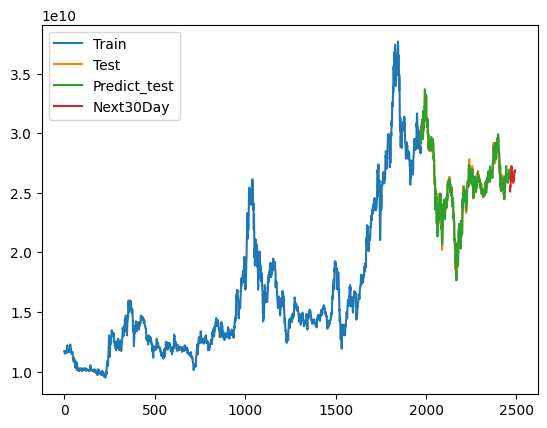

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# Assuming 'data' is your training data, replace it with your actual training data
exog_data = data[['High', 'Open', 'Low']][last_index - 523:last_index]

y_next_30_days = model.predict(start=int(x_next_30_days[0]), end=int(len(x_next_30_days) + x_next_30_days[0] - 1),
                               exog=data[['High','Open','Low']][last_index-523:last_index])

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predict_test','Next30Day'])
plt.show()